<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h1>A1: Python Analysis</h1>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<b>Team 11</b><br>
&emsp;<i>Asamoah, Barbara<br>
&emsp;Brandares, Eunice<br>
&emsp;Ologe, Mojisola<br>
&emsp;Pina, Henrique<br>
&emsp;Polonio, Linette<br>
&emsp;Ramirez, Thaly</i> 
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<br>

## 1 Executive Summary<br>

<br><i>Introduction<br><br></i>
The computer system of the Spaceship Titanic was damaged by a spacetime anomaly, and more than six thousand passengers were transported to different dimensions. Although the remaining travelers are out of danger, Titanic's crews are urgently looking to rescue the lost cabins as the first forty-eight hours are critical to finding them alive. After twenty-eight hours, the management board of Titanic urges minimizing human loss is critical to protect Spaceship's reputation, avoiding legal fines, and reducing financial loss. Additionally, based on this experience, it is important to develop new processes to overcome similar situations in the future (Chow et al., 2022). <sup>1</sup>.

With the goal of assisting the rescue teams, the analysts team developed a predicting model with 93% accuracy and 89% efficiency that uses passengers' records from the damaged system to identify the passengers transported by the anomaly. Prediction models used include Gradient Boosting Model, Logistic Regression Model, Decision Tree Model, and Random Forest. CryoSleep, Spa, VRDeck, RoomService, and FoodCourt are the five major features of the final model that best represent the types of activities taken by travelers who were most likely to get transported to an alternate dimension.

The process, guidelines, and other resources used to create and evaluate the models are documented in this document. It aims to assist Captain Buzz Lightyear and the rescue teams in creating accurate contingency plans that will be helpful to the Spaceship management team.


<i>Actionable Insights<br><br></i>
The analysis revealed three main actionable insights for Titanic Spaceship. Firstly, it is important to encourage passengers to spend more money on luxurious amenities like the Spa, VR deck, Room Service, and Food Court. This is essential because the features increase the likelihood that a passenger will get transported to a different dimension if the ship encounters a spacetime anomaly. In this case, passengers who recorded lesser spending on the features were observed to remain unsaved. 

The Cryosleep service should no longer be offered because it has been found to be the primary cause of wrong transportation. The reason behind this may be that the technique has not yet been perfected, and consequently, its flaws create uncertain circumstances (Gorla, 2022)<sup>2</sup>, like the one presented by Titanic's Spaceship. 

Secondly, it is recommended to make a deeper analysis of the relationship between the ship’s location and the nearest destination to it, to identify if passengers should be advised to take stronger precautions when they are approaching that destination. This is important because it was observed that as passengers get closer to their intended destination, the likelihood that they will be taken somewhere else increases. This was the situation with the passengers going to 55 Cancri E, a planet so close to its star with free-flowing lava lakes (Jet Propulsion Laboratory, 2017)<sup>3</sup>.  

Therefore, there may be a negative correlation that makes the anomaly to ward off passengers from their destination, and Titanic may develop preventive measures depending on geolocations. In this way, for example, they can advise people with Cancri E as a destination to safeguard themselves in special capsules or offer special discounts for the luxury service previously indicated to increase their exposure and reduce the chances of being transported if an anomaly occurs. Once the relationship is confirmed, Titanic can advise passengers to safeguard themselves in special capsules or offer special discounts for the luxury service previously indicated to increase their exposure and reduce the chances of being transported if an anomaly occurs. 

Thirdly, Titanic's Spaceship management team should create a contingency plan with sufficient resources to support a minimum of 53% of the passengers on board. This is necessary due to the failure to adequately prepare for a similar incident that occurred 1,000 years ago. By documenting an action plan, the management team can better anticipate the resources required to handle similar situations in the future, such as preparing an adequate and effective rescue team.

<i>Conclusion<br><br></i>
The Spaceship Titanic might have collided with a black hole, since according to Nasa (2020)<sup>4</sup>, cosmic clouds have been observed within the vicinity. Developing a predicting model with 93% accuracy and 89% efficiency provides valuable insights to the Spaceship Titanic management team to minimize human loss, protect the Spaceship's reputation, and reduce financial loss. The actionable insights include encouraging passengers to spend more money on luxurious amenities like Spa, VR deck, Room Service, and Food Court, discontinuing the Cryosleep service, analyzing the relationship between the ship's location and the nearest destination, and creating a contingency plan with sufficient resources to support a minimum of 53% of the passengers on board. These measures can help the Spaceship Titanic management team better prepare for and handle similar incidents in the future, ensuring the safety and well-being of all passengers and crew members.


## 2 Analysis and Program Coding

In [ ]:
##### Updating the sklearn version
##### This is required to run the log_loss under sklearn.metrics
##### Would get an error if not updated

!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Importing Modules

In [ ]:
# Importing basic modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the statistical models
from sklearn.model_selection import train_test_split, KFold, \
StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, \
OneHotEncoder, LabelEncoder
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, \
f1_score, classification_report, log_loss
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, \
AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.impute import SimpleImputer

# Importing other required modules
import scipy.stats as stats
from scipy.stats import chi2_contingency

from datetime import date

from math import ceil

import sys

import warnings
warnings.filterwarnings("ignore")

##### Importing Datasets

In [ ]:
# Importing the train dataset

pd.set_option('display.float_format', lambda x: '%.5f' % x)

train_df = pd.read_csv('./train.csv',low_memory = False, encoding='utf-8')

In [ ]:
# Checking the train dataset

train_df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.00000,False,0.00000,0.00000,0.00000,0.00000,0.00000,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.00000,False,109.00000,9.00000,25.00000,549.00000,44.00000,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.00000,True,43.00000,3576.00000,0.00000,6715.00000,49.00000,Altark Susent,False


#### Output 1: The training dataset
This is the dataset used for the training of the predictive model for the variable “Transported”. This dataset includes numerous variables such as Home Planet, Destination, and Age. Some variables, as seen on Kaggle (under Data tab > File and Data Field Descriptions), are a combination of at least two things. The team decided to make new variables out of the following:<br>
<b>PassengerId</b> - <i>A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.</i> A new variable, Group_ID, will be created from this.<br>
<b>Cabin</b> - <i>The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.</i> This variable will be splitted into three: CDeck, CNumber, and CSide; to indicate the specific part of the cabin.

In [ ]:
# Making a passenger group ID
# From Kaggle: PassengerId - A unique Id for each passenger. Each Id takes the 
# form gggg_pp where gggg indicates a group the passenger is travelling with and 
# pp is their number within the group. People in a group are often family 
# members, but not always.

new = train_df['PassengerId'].str.split("_", n=1, expand=True)
train_df['Group_ID']=new[0]

In [ ]:
# Separating Cabin to Deck, Number, Side
# From Kaggle: Cabin - The cabin number where the passenger is staying. Takes 
# the form deck/num/side, where side can be either P for Port or S for Starboard.

cabin_split = train_df['Cabin'].str.split("/", n=2, expand=True)
train_df['CDeck']=cabin_split[0]
train_df['CNumber']=cabin_split[1]
train_df['CSide']=cabin_split[2]

train_df.drop(columns='Cabin', inplace=True)

In [ ]:
# Checking the new variable: CDeck

train_df['CDeck'].value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: CDeck, dtype: int64

In [ ]:
# Update the dataframe index

train_df.set_index('PassengerId', inplace=True)

In [ ]:
# Dropping irrelevant column - Name

train_df.drop('Name', inplace=True, axis=1)

#### Exploratory Data Analysis (EDA)

In [ ]:
# Check the dataframe

train_df.head(3)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Group_ID,CDeck,CNumber,CSide
PassengerId,,,,,,,,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,39.00000,False,0.00000,0.00000,0.00000,0.00000,0.00000,False,0001,B,0,P
0002_01,Earth,False,TRAPPIST-1e,24.00000,False,109.00000,9.00000,25.00000,549.00000,44.00000,True,0002,F,0,S
0003_01,Europa,False,TRAPPIST-1e,58.00000,True,43.00000,3576.00000,0.00000,6715.00000,49.00000,False,0003,A,0,S


In [ ]:
# Check the dataframe and missing values

df_info = pd.DataFrame(columns=["column", "NaN", "NaN %"])
for index, value in train_df.isna().sum().iteritems():
    df_temp = pd.DataFrame({"column" : index, "NaN" : [value], \
                            "NaN %" : round(value*100 /len(train_df), 2)})
    df_info = pd.concat([df_info, df_temp], ignore_index=True)
    df_info.sort_values(by="NaN", ascending=False, inplace=True)

print(df_info)

          column  NaN   NaN %
0      CryoSleep  217 2.50000
1   ShoppingMall  208 2.39000
2            VIP  203 2.34000
3     HomePlanet  201 2.31000
4          CDeck  199 2.29000
5        CNumber  199 2.29000
14         CSide  199 2.29000
6         VRDeck  188 2.16000
7      FoodCourt  183 2.11000
8            Spa  183 2.11000
9    Destination  182 2.09000
10   RoomService  181 2.08000
11           Age  179 2.06000
12   Transported    0 0.00000
13      Group_ID    0 0.00000


In [ ]:
# Check for duplicates

train_df.duplicated().sum()

9

In [ ]:
# Check the dataframe info and datatype

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Destination   8511 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   bool   
 11  Group_ID      8693 non-null   object 
 12  CDeck         8494 non-null   object 
 13  CNumber       8494 non-null   object 
 14  CSide         8494 non-null   object 
dtypes: bool(1), float64(6), object(8)
memory usage: 1.0+ MB


In [ ]:
# Check descriptive statistics

train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.00000,28.82793,14.48902,0.00000,19.00000,27.00000,38.00000,79.00000
RoomService,8512.00000,224.68762,666.71766,0.00000,0.00000,0.00000,47.00000,14327.00000
FoodCourt,8510.00000,458.07720,1611.48924,0.00000,0.00000,0.00000,76.00000,29813.00000
ShoppingMall,8485.00000,173.72917,604.69646,0.00000,0.00000,0.00000,27.00000,23492.00000
Spa,8510.00000,311.13878,1136.70553,0.00000,0.00000,0.00000,59.00000,22408.00000
VRDeck,8505.00000,304.85479,1145.71719,0.00000,0.00000,0.00000,46.00000,24133.00000


In [ ]:
# Check missing data

train_df.isnull().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
Group_ID          0
CDeck           199
CNumber         199
CSide           199
dtype: int64

### Problem Solving
The following activities were carried out during problem solving:

<i>Fixing the missing values and outliers.<br>
Turning categorical variables to dummy/numerical variables.<br>
Checking the data distribution using scalar methods.<br>
Data exploration.<br>
Statistical Modeling.<br>

In [ ]:
#### Doing various imputer methods for missing values

df_imputed = train_df.copy()
numeric=['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', \
         'VRDeck', 'CNumber']
categorical=df_imputed.columns.difference(numeric)

#KNN imputer to fill numeric missing values
imputer = KNNImputer(n_neighbors=5, weights='uniform')
# Fit and transform the DataFrame to fill missing values
df_imputed[numeric] = imputer.fit_transform(train_df[numeric])

#Impute categorical features using mode
mode_imputer = SimpleImputer(strategy='most_frequent')
df_imputed[categorical] = mode_imputer.fit_transform(df_imputed[categorical].\
                                                     values)


df_imputed.head(3)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Group_ID,CDeck,CNumber,CSide
PassengerId,,,,,,,,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,39.00000,False,0.00000,0.00000,0.00000,0.00000,0.00000,False,0001,B,0.00000,P
0002_01,Earth,False,TRAPPIST-1e,24.00000,False,109.00000,9.00000,25.00000,549.00000,44.00000,True,0002,F,0.00000,S
0003_01,Europa,False,TRAPPIST-1e,58.00000,True,43.00000,3576.00000,0.00000,6715.00000,49.00000,False,0003,A,0.00000,S


In [ ]:
# Re-check missing data

df_imputed.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Group_ID        0
CDeck           0
CNumber         0
CSide           0
dtype: int64

In [ ]:
numeric.append('Group_ID')

# Convert the columns to integer data type

df_imputed[numeric] = df_imputed[numeric].astype(int)

In [ ]:
# Transform 'VIP' and 'Transported' variables from Boolean to integer values

df_imputed[['VIP', 'Transported', 'CryoSleep']]=df_imputed[['VIP', \
                                                            'Transported', \
                                                            'CryoSleep']]*1

In [ ]:
# Checking dataframe

df_imputed.head(3)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Group_ID,CDeck,CNumber,CSide
PassengerId,,,,,,,,,,,,,,,
0001_01,Europa,0,TRAPPIST-1e,39,0,0,0,0,0,0,0,1,B,0,P
0002_01,Earth,0,TRAPPIST-1e,24,0,109,9,25,549,44,1,2,F,0,S
0003_01,Europa,0,TRAPPIST-1e,58,1,43,3576,0,6715,49,0,3,A,0,S


In [ ]:
# Checking count for destination

df_imputed['Destination'].value_counts()

TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

#### Splitting the Data

In [ ]:
train_data = df_imputed.drop('Transported', axis=1).copy()
train_target = df_imputed['Transported'].copy()

In [ ]:
# Identifying the train and test datasets

X_train, X_test, y_train, y_test = train_test_split(train_data, \
                                                    train_target, \
                                                    test_size = 0.2, \
                                                    random_state=10
                                                    ,shuffle=True, \
                                                    stratify=train_target)

In [ ]:
# Defining data types for numerical and categorical data

train_data_num = X_train.select_dtypes(include=np.number).\
  set_index(X_train.index).copy()
train_data_cat = X_train.select_dtypes(exclude=np.number).\
  set_index(X_train.index).copy()

test_data_num = X_test.select_dtypes(include=np.number).\
  set_index(X_test.index).copy()
test_data_cat = X_test.select_dtypes(exclude=np.number).\
  set_index(X_test.index).copy()

In [ ]:
# Check descriptive statistics

train_data_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,6954.00000,28.80975,14.29881,0.00000,20.00000,27.00000,37.00000,79.00000
RoomService,6954.00000,226.22563,672.48626,0.00000,0.00000,0.00000,56.00000,14327.00000
FoodCourt,6954.00000,462.24763,1623.61071,0.00000,0.00000,0.00000,72.75000,29813.00000
ShoppingMall,6954.00000,171.52286,607.03786,0.00000,0.00000,0.00000,28.00000,23492.00000
Spa,6954.00000,321.83118,1176.06084,0.00000,0.00000,0.00000,71.00000,22408.00000
VRDeck,6954.00000,307.64150,1150.88663,0.00000,0.00000,0.00000,52.00000,24133.00000
Group_ID,6954.00000,4628.38323,2681.93340,2.00000,2306.00000,4612.50000,6898.75000,9280.00000
CNumber,6954.00000,597.63115,507.23489,0.00000,170.00000,429.00000,985.75000,1894.00000


#### Dealing with Outliers

In [ ]:
def box_plot_all_vars(data):
    # All Numeric Variables' Box Plots in one figure
    sns.set()

    # Prepare figure. Create individual axes where each box plot will be placed
    fig, axes = plt.subplots(3, ceil(len(data.columns.to_list()) / 3), \
                             figsize=(25, 20))

    # Plot data
    # Iterate across axes objects and associate each box plot 
    # (hint: use the ax argument):
    for ax, feat in zip(axes.flatten(), data.columns.to_list()): 
      # Notice the zip() function and flatten() method
        bxplot = sns.boxplot(x=data[feat], ax=ax, color='chartreuse',fliersize=8)
        bxplot.set_xlabel(fontsize=16, xlabel=feat)
        
    # Layout
    # Add a centered title to the figure:
    title = "Numeric Variables' Box Plots"

    plt.suptitle(title, size=30)

    plt.show()

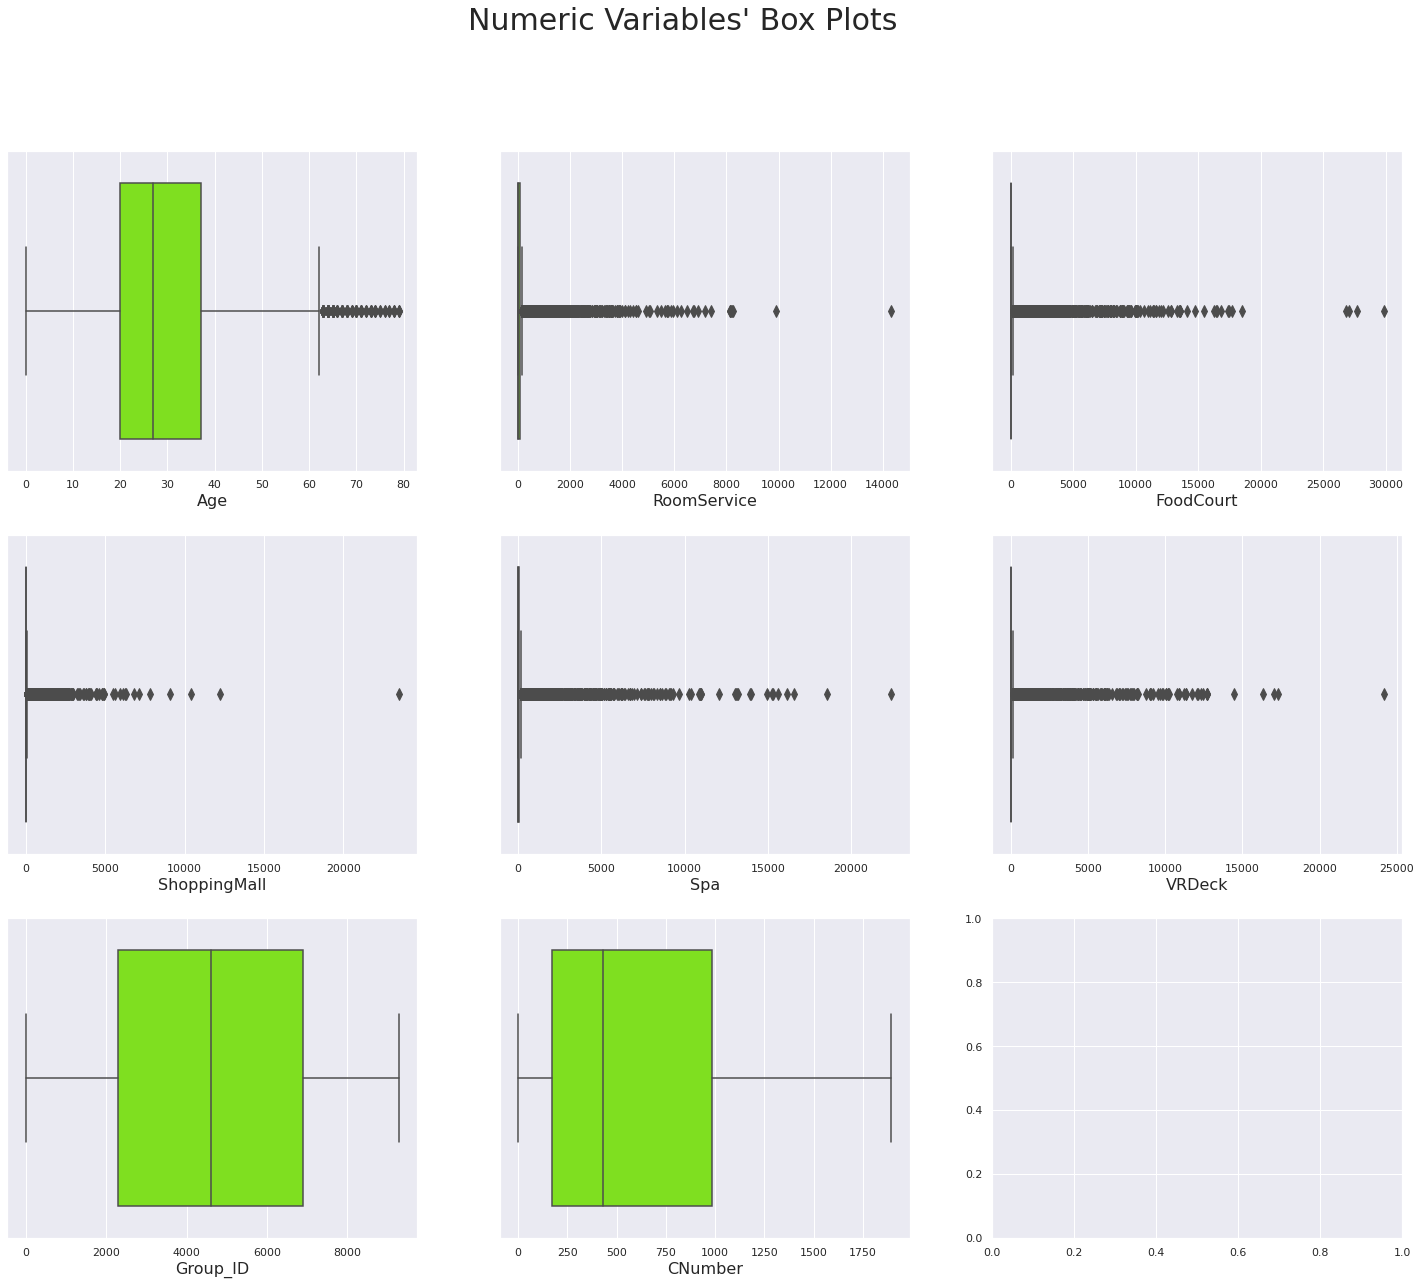

In [ ]:
# Checking the outliers

box_plot_all_vars(train_data_num)

#### Output 2: Numeric’ variables Box plots<br>
The Numeric variables Box plots explain and compare the data distribution of the features of Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, Group_Id, and CNumber. 
The distribution of the luxury amenities billed to passengers are represented by the outliers observed in the following features RoomService, FoodCourt, ShoppingMall, Spa, VRDeck and Age.



In [ ]:
# Dealing with outliers using the Observation Method

filters1 = (
    (train_data_num['RoomService']<8000)
    &
    (train_data_num['FoodCourt']<25000)
    &
    (train_data_num['ShoppingMall']<10000)
    &
    (train_data_num['Spa']<16000)
    &
    (train_data_num['VRDeck']<14000)
)

df_1 = train_data_num[filters1]
print('Percentage of data kept after removing outliers:', \
      np.round(df_1.shape[0] / train_data_num.shape[0], 4))

Percentage of data kept after removing outliers: 0.9967


In [ ]:
# Dealing with outliers using the IQR Method

metric_features = train_data_num.columns.to_list()
q25 = train_data_num.quantile(.25)
q75 = train_data_num.quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr

filters2 = []
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters2.append(train_data_num[metric].between(llim, ulim, inclusive=True))

filters2 = pd.Series(np.all(filters2, 0))
df_2=train_data_num.copy()
df_2['filters2'] = filters2.to_list()
df_2=df_2[df_2['filters2']!=False]
print('Percentage of data kept after removing outliers:', \
      np.round(df_2.shape[0] / train_data_num.shape[0], 4))

Percentage of data kept after removing outliers: 0.4144


^ The IQR Method removes too much information

In [ ]:
## Use the observation method to continue

train_data_num=df_1.copy()

In [ ]:
# Remove from train_data_cat and train_target all records removed on train_data_num

train_data_cat=train_data_cat[train_data_cat.index.isin(train_data_num.index)]
y_train=y_train[y_train.index.isin(train_data_num.index)]

In [ ]:
# Checking the shape of the train dataset

train_data_cat.shape

(6931, 6)

#### Correlations

In [ ]:
# Create a dataframe with target variable to check correlations

train_data_corr=train_data_num.join(y_train)

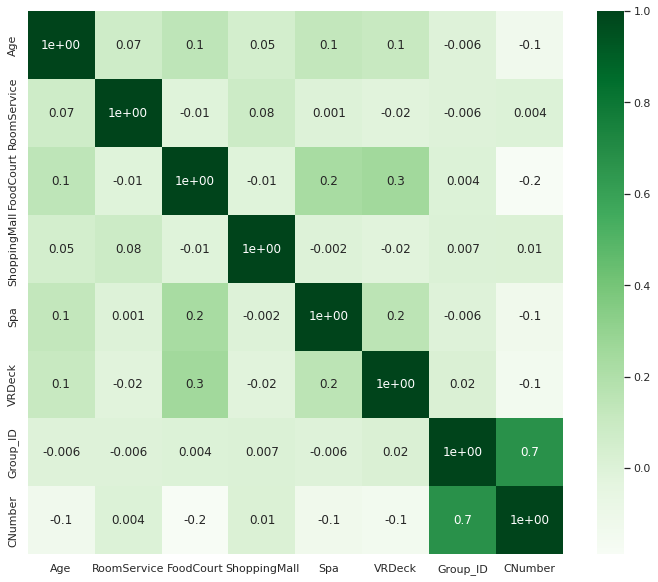

In [ ]:
# Making a correlation visual

def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Greens, fmt='.1')
    plt.show()
cor_pearson = train_data_corr.corr()
cor_heatmap(cor_pearson)

#### Output 3: Correlation Table<br>
This table shows the correlation level of the independent variables with each other. The darker the color in the graph, the more correlated those two variables are. It can be noted from this graph that most of the variables seem to have low correlation with each other, with correlation value of less than 0.5. However, there are two variables that look highly correlated with each other - Group_ID and CNumber. This suggests that groups travelling together share similar cabin numbers.

In [ ]:
# Doing a Test for Independence

def Test_Independence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, \
                              index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".\
        format(var)
    print(result)
  
for var in train_data_cat:
    Test_Independence(train_data_cat[var],y_train, var)

HomePlanet is IMPORTANT for Prediction
CryoSleep is IMPORTANT for Prediction
Destination is IMPORTANT for Prediction
VIP is IMPORTANT for Prediction
CDeck is IMPORTANT for Prediction
CSide is IMPORTANT for Prediction


In [ ]:
# Updating the distribution using Scalar Method 

scaler = MinMaxScaler()
train_data_num_scaled = scaler.fit_transform(train_data_num)
train_data_num_scaled = pd.DataFrame(train_data_num_scaled, columns = \
                                     train_data_num.columns).\
                                     set_index(train_data_num.index)

test_data_num_scaled = scaler.transform(test_data_num)
test_data_num_scaled = pd.DataFrame(test_data_num_scaled, columns = \
                                    test_data_num.columns).\
                                    set_index(test_data_num.index)


# Checking the train

train_data_num_scaled.head(3)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group_ID,CNumber
PassengerId,,,,,,,,
8480_02,0.48101,0.00000,0.04583,0.00033,0.00218,0.00000,0.91377,0.72967
6929_01,0.05063,0.00000,0.00000,0.00000,0.00000,0.00000,0.74660,0.59240
6800_01,0.18987,0.00000,0.00000,0.00000,0.00000,0.00000,0.73270,0.58342


In [ ]:
# Checking the test

test_data_num_scaled.head(3)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group_ID,CNumber
PassengerId,,,,,,,,
5514_02,0.02532,0.00000,0.00000,0.00000,0.00000,0.00000,0.59409,0.46938
5014_01,0.32911,0.17972,0.00000,0.10742,0.03105,0.00000,0.54020,0.08553
6799_01,0.50633,0.00000,0.00000,0.00000,0.00000,0.00000,0.73259,0.13305


In [ ]:
# Checking the Cabin-Deck counts for train data

train_data_cat['CDeck'].value_counts()

F    2396
G    2016
E     709
B     628
C     592
D     384
A     202
T       4
Name: CDeck, dtype: int64

In [ ]:
# Using One Hot Encoder to encode categorical features as a one-hot numeric array.

df_ohc = train_data_cat.copy()
train_data_cat_plot = train_data_cat.copy()

ohc = OneHotEncoder(sparse=False)
ohc_feat = ohc.fit_transform(df_ohc.drop(['CryoSleep', 'VIP'], axis=1))
ohc_feat_names = ohc.get_feature_names_out()
ohc_df = pd.DataFrame(ohc_feat, index=df_ohc.index, columns=ohc_feat_names)
ohc_df.head(3)

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CDeck_A,CDeck_B,CDeck_C,CDeck_D,CDeck_E,CDeck_F,CDeck_G,CDeck_T,CSide_P,CSide_S
PassengerId,,,,,,,,,,,,,,,,
8480_02,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000
6929_01,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000
6800_01,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000


In [ ]:
# Concatenate one hot encoder with the other 2 categorical features (dummy variables)

train_data_cat  = pd.concat([train_data_cat,ohc_df],axis = 1)
train_data_cat.drop(['HomePlanet', 'CDeck', 'CSide', 'Destination'], \
                    inplace=True, axis=1)

In [ ]:
# Checking the train dataset

train_data_cat.head(3)

,CryoSleep,VIP,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CDeck_A,CDeck_B,CDeck_C,CDeck_D,CDeck_E,CDeck_F,CDeck_G,CDeck_T,CSide_P,CSide_S
PassengerId,,,,,,,,,,,,,,,,,,
8480_02,0,0,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000
6929_01,0,0,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000
6800_01,1,0,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000


In [ ]:
# Concatenating categorical features with remaining dataset

X_train=train_data_num_scaled.merge(train_data_cat, on = 'PassengerId')

# Checking the final x_train dataset 
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6931 entries, 8480_02 to 3495_02
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        6931 non-null   float64
 1   RoomService                6931 non-null   float64
 2   FoodCourt                  6931 non-null   float64
 3   ShoppingMall               6931 non-null   float64
 4   Spa                        6931 non-null   float64
 5   VRDeck                     6931 non-null   float64
 6   Group_ID                   6931 non-null   float64
 7   CNumber                    6931 non-null   float64
 8   CryoSleep                  6931 non-null   object 
 9   VIP                        6931 non-null   object 
 10  HomePlanet_Earth           6931 non-null   float64
 11  HomePlanet_Europa          6931 non-null   float64
 12  HomePlanet_Mars            6931 non-null   float64
 13  Destination_55 Cancri e    6931 non-null   f

#### Apply all the previous steps to the Test dataframe

In [ ]:
# Apply to test split too
df_ohc_test = test_data_cat.copy()
ohc_feat_test = ohc.fit_transform(df_ohc_test.drop(['CryoSleep', 'VIP'],axis=1))
ohc_feat_names_test = ohc.get_feature_names_out()
ohc_df_test = pd.DataFrame(ohc_feat_test, index=df_ohc_test.index, \
                           columns=ohc_feat_names_test)

####

test_data_cat  = pd.concat([test_data_cat,ohc_df_test],axis = 1)
test_data_cat.drop(['HomePlanet', 'CDeck', 'CSide', 'Destination'], \
                   inplace=True, axis=1)

X_test=test_data_num_scaled.merge(test_data_cat, on = 'PassengerId')

In [ ]:
# Checking the test dataset

test_data_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1739 entries, 5514_02 to 9192_01
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  1739 non-null   object 
 1   VIP                        1739 non-null   object 
 2   HomePlanet_Earth           1739 non-null   float64
 3   HomePlanet_Europa          1739 non-null   float64
 4   HomePlanet_Mars            1739 non-null   float64
 5   Destination_55 Cancri e    1739 non-null   float64
 6   Destination_PSO J318.5-22  1739 non-null   float64
 7   Destination_TRAPPIST-1e    1739 non-null   float64
 8   CDeck_A                    1739 non-null   float64
 9   CDeck_B                    1739 non-null   float64
 10  CDeck_C                    1739 non-null   float64
 11  CDeck_D                    1739 non-null   float64
 12  CDeck_E                    1739 non-null   float64
 13  CDeck_F                    1739 non-null   f

In [ ]:
# Chanking the y train and test datasets datatypes

y_train=y_train.astype(int)
y_test=y_test.astype(int)

### Modeling
In this project, several machine learning models were trained and evaluated to predict whether a passenger gets transported or not. The models used are Random Forest, Gradient Boosting, Extra Tree, and AdaBoost classifiers. Different versions of these models were used by tuning their hyperparameters, such as the number of estimators, learning rate, max depth, and criterion and performances from them were evaluated based on their F1 score, train accuracy, and test accuracy metrics.

In [ ]:
# Random Forest version 1
RF1 = RandomForestClassifier(class_weight='balanced', n_estimators=110,
                            criterion='gini', max_features=None)

RF1.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features=None,
                       n_estimators=110)

In [ ]:
# Random Forest version 2 with log_loss
RF2 = RandomForestClassifier(class_weight='balanced_subsample', n_estimators=90,
                             criterion='log_loss', max_features=None)

RF2.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', criterion='log_loss',
                       max_features=None, n_estimators=90)

In [ ]:
# Gradient Boosting version 1
GB1= GradientBoostingClassifier(learning_rate=0.6,n_estimators=120,\
                                criterion='squared_error', loss='exponential',
                                max_features='sqrt' )

GB1.fit(X_train, y_train)

GradientBoostingClassifier(criterion='squared_error', learning_rate=0.6,
                           loss='exponential', max_features='sqrt',
                           n_estimators=120)

In [ ]:
# Gradient Boosting version 2 with log_loss
GB2= GradientBoostingClassifier(learning_rate=0.3,n_estimators=140,\
                                criterion='squared_error', loss='log_loss',
                                max_features='log2' )

GB2.fit(X_train, y_train)

GradientBoostingClassifier(criterion='squared_error', learning_rate=0.3,
                           max_features='log2', n_estimators=140)

In [ ]:
# Extra Tree Classifier
etc = ExtraTreesClassifier(class_weight='balanced', random_state=22, \
                           n_estimators=130, criterion='log_loss', \
                           max_features='sqrt', max_depth=21)

etc.fit(X_train, y_train)

ExtraTreesClassifier(class_weight='balanced', criterion='log_loss',
                     max_depth=21, n_estimators=130, random_state=22)

In [ ]:
# ADA Boost Classifier
adaboost = AdaBoostClassifier(n_estimators=50, random_state=0, \
                              algorithm='SAMME.R',learning_rate=0.5).\
                              fit(X_train,y_train)

In [ ]:
# Random Forest version 3
RF3 = RandomForestClassifier(n_estimators     = 100,
                             criterion        = "gini",
                             max_depth        = 10,
                             min_samples_leaf = 1,
                             bootstrap        = True,
                             warm_start       = False,
                             random_state     = 42).fit(X_train, y_train)

In [ ]:
# Gradient Boosting Classifier - full GBM model
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 3,
                                              warm_start    = False,
                                              random_state  = 219).\
                                              fit(X_train, y_train)

In [ ]:
# Defining function for evaluation

# Checking accuracy of models
def train_test_accuracy(model):
      train_accuracy=metrics.accuracy_score(y_train, model.predict(X_train))*100
      test_accuracy=metrics.accuracy_score(y_test, model.predict(X_test))*100
      return train_accuracy, test_accuracy


# Checking f1 score of models
def f1_score(model):
      return metrics.f1_score(y_test,model.predict(X_test)) 

In [ ]:
# Evaluation of all the models

models=[ RF1, RF2, GB1,  GB2, etc, RF3, full_gbm_default, adaboost]
models_names=[ 'RF1', 'RF2', 'GB1', 'GB2',  'etc',  'RF3', \
              'full_gbm_default', 'adaboost']
models_acc=list(map(train_test_accuracy, models))
result_tuple = list(map(list, zip(*models_acc)))
train_acc, test_acc = result_tuple

results = pd.DataFrame({
    'Model': models_names,
    'Score': list(map(f1_score, models)),
    'Train Acc': train_acc,
    'Test Acc': test_acc
    })
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Score,Train Acc,Test Acc
Model,,,
GB2,0.80269,85.29794,79.75848
full_gbm_default,0.79420,82.84519,78.78091
GB1,0.78713,86.35118,78.32087
RF3,0.78166,87.72183,78.09086
adaboost,0.77437,80.76757,76.71075
RF1,0.77275,99.98557,77.74583
RF2,0.76759,99.98557,77.40081
etc,0.75866,99.14875,77.17079


#### Output 4: Model Comparison

Based on the evaluation results, the Gradient Boosting model with log-loss consideration and the Full Gradient Boosting were found to have the highest F1 scores, indicating that they performed the best in predicting passenger transportation more than the other models. 

The default Gradient Boosting model1(GB1), Random Forest1(RF1), Random Forest2 (RF2), and Random Forest3 (RF3) also performed well with similar F1 scores. However, RF1 and RF2 showed overfitting on the training data with an accuracy score of 99.97114.  

The model with the best predictive score according to Kaggle is the Full Gradient Boosting Classifier model, with a score of <b>0.80640</b>. The Full Gradient Boosting Model was therefore used for prediction on the test data being the model with the best performance metrics on the train data.

#### Applying the model to Test dataset

In [ ]:
# Importing the test dataset

test = pd.read_csv('./test.csv')
test.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.00000,False,0.00000,0.00000,0.00000,0.00000,0.00000,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.00000,False,0.00000,9.00000,0.00000,2823.00000,0.00000,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.00000,False,0.00000,0.00000,0.00000,0.00000,0.00000,Sabih Unhearfus


In [ ]:
# Checking the shape of the dataset

test.shape

(4277, 13)

In [ ]:
# Updating the test dataset

new = test['PassengerId'].str.split("_", n=1, expand=True)
test['Group_ID']=new[0]

cabin_split = test['Cabin'].str.split("/", n=2, expand=True)
test['CDeck']=cabin_split[0]
test['CNumber']=cabin_split[1]
test['CSide']=cabin_split[2]

test.drop(columns='Cabin', inplace=True)

In [ ]:
test.set_index('PassengerId', inplace=True)

# Dropping irrelevant column - Name
test.drop('Name', inplace=True, axis=1)

In [ ]:
# Checking Missing Values

test.isna().sum()

HomePlanet       87
CryoSleep        93
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Group_ID          0
CDeck           100
CNumber         100
CSide           100
dtype: int64

In [ ]:
#### Doing various imputer methods for missing values

categorical=test.columns.difference(numeric)
numeric=['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','CNumber']

# KNN imputer to fill numeric missing values
imputer = KNNImputer(n_neighbors=5, weights='uniform')

# Fit and transform the DataFrame to fill missing values
test[numeric] = imputer.fit_transform(test[numeric])

#Impute categorical features using mode
mode_imputer = SimpleImputer(strategy='most_frequent')
test[categorical] = mode_imputer.fit_transform(test[categorical].values)

test.head(3)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group_ID,CDeck,CNumber,CSide
PassengerId,,,,,,,,,,,,,,
0013_01,Earth,True,TRAPPIST-1e,27.00000,False,0.00000,0.00000,0.00000,0.00000,0.00000,0013,G,3.00000,S
0018_01,Earth,False,TRAPPIST-1e,19.00000,False,0.00000,9.00000,0.00000,2823.00000,0.00000,0018,F,4.00000,S
0019_01,Europa,True,55 Cancri e,31.00000,False,0.00000,0.00000,0.00000,0.00000,0.00000,0019,C,0.00000,S


In [ ]:
# Re-check missing data

test.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Group_ID        0
CDeck           0
CNumber         0
CSide           0
dtype: int64

In [ ]:
numeric.append('Group_ID')

# Convert the columns to integer data type
test[numeric] = test[numeric].astype(int)

In [ ]:
# Transform 'VIP' and 'Transported' variables from Boolean to integer values

test[['VIP', 'CryoSleep']]=test[['VIP',  'CryoSleep']]*1

In [ ]:
# Checking test dataframe

test.head(3)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group_ID,CDeck,CNumber,CSide
PassengerId,,,,,,,,,,,,,,
0013_01,Earth,1,TRAPPIST-1e,27,0,0,0,0,0,0,13,G,3,S
0018_01,Earth,0,TRAPPIST-1e,19,0,0,9,0,2823,0,18,F,4,S
0019_01,Europa,1,55 Cancri e,31,0,0,0,0,0,0,19,C,0,S


In [ ]:
# Defining data types for numerical and categorical data

test_df_num = test.select_dtypes(include=np.number).set_index(test.index).copy()
test_df_cat = test.select_dtypes(exclude=np.number).set_index(test.index).copy()

In [ ]:
# Updating the distribution using Scalar Method

test_df_scaled = scaler.transform(test_df_num)
test_df_scaled = pd.DataFrame(test_df_scaled, columns = test_df_num.columns).\
set_index(test_df_num.index)

In [ ]:
# Checking test dataframe - first three values

test_df_scaled.head(3)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group_ID,CNumber
PassengerId,,,,,,,,
0013_01,0.34177,0.00000,0.00000,0.00000,0.00000,0.00000,0.00119,0.00158
0018_01,0.24051,0.00000,0.00049,0.00000,0.18112,0.00000,0.00172,0.00211
0019_01,0.39241,0.00000,0.00000,0.00000,0.00000,0.00000,0.00183,0.00000


In [ ]:
# Using One Hot Encoder to encode categorical features as a one-hot numeric array.

df_ohc = test_df_cat.copy()
ohc_feat = ohc.fit_transform(df_ohc.drop(['CryoSleep', 'VIP'], axis=1))
ohc_feat_names = ohc.get_feature_names_out()
ohc_df = pd.DataFrame(ohc_feat, index=df_ohc.index, columns=ohc_feat_names)
ohc_df.head(3)

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CDeck_A,CDeck_B,CDeck_C,CDeck_D,CDeck_E,CDeck_F,CDeck_G,CDeck_T,CSide_P,CSide_S
PassengerId,,,,,,,,,,,,,,,,
0013_01,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000
0018_01,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000
0019_01,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000


In [ ]:
# Concatenate one hot encoder with the other 2 categorical features (dummy variables)

test_df_cat  = pd.concat([test_df_cat,ohc_df],axis = 1)
test_df_cat.drop(['HomePlanet', 'CDeck', 'CSide', 'Destination'], inplace=True, \
                 axis=1)
test_df_cat
test_data=test_df_scaled.merge(test_df_cat, on = 'PassengerId')

In [ ]:
# Checking test_data dataframe

test_data.head(3)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group_ID,CNumber,CryoSleep,VIP,...,CDeck_A,CDeck_B,CDeck_C,CDeck_D,CDeck_E,CDeck_F,CDeck_G,CDeck_T,CSide_P,CSide_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
0013_01,0.34177,0.00000,0.00000,0.00000,0.00000,0.00000,0.00119,0.00158,1,0,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000
0018_01,0.24051,0.00000,0.00049,0.00000,0.18112,0.00000,0.00172,0.00211,0,0,...,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000
0019_01,0.39241,0.00000,0.00000,0.00000,0.00000,0.00000,0.00183,0.00000,1,0,...,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000


### DEPLOYMENT OF THE MODEL
The team decided to use the Full Gradient Boosting Classifier model since it has the best score in Kaggle, with a score of <b>0.80640</b>.

In [ ]:
## Using the full_gbm_default model

res=full_gbm_default.predict(test_data)
list_tuples = list(zip(test_data.index, res))
predictions = pd.DataFrame(list_tuples, columns=['PassengerId', 'Transported'])

# Evaluation of the full gbm model

models1=[full_gbm_default]
models_acc1=list(map(train_test_accuracy, models1))
result_tuple1 = list(map(list, zip(*models_acc1)))
train_acc1, test_acc1 = result_tuple1

gbm_results = pd.DataFrame({
    'Model': 'Full Gradient Boosting Classifier',
    'F1 Score': list(map(f1_score, models1)),
    'Train Accuracy': train_acc1,
    'Test Accuracy': test_acc1
    })
gbm_results = gbm_results.set_index('Model')
gbm_results

,F1 Score,Train Accuracy,Test Accuracy
Model,,,
Full Gradient Boosting Classifier,0.79420,82.84519,78.78091


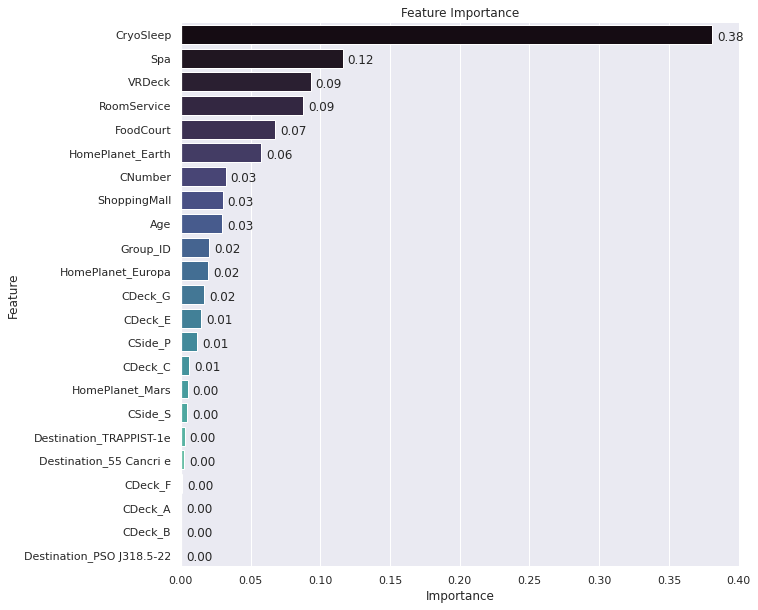

In [ ]:
# Plot feature importance

# Create a dataframe of feature importance
feature_imp = pd.DataFrame(full_gbm_default.feature_importances_, \
                           X_train.columns, columns=['Importance'])

# Filter out importance levels that equal 0 and sort by descending
feature_imp = feature_imp[feature_imp['Importance'] != 0]\
                            .sort_values('Importance', ascending = False)

# Plot

fig, ax = plt.subplots(figsize = (10, 10))

ax = sns.barplot(data    = feature_imp,
                 x       = 'Importance',
                 y       = feature_imp.index,
                 orient  = 'h',
                 palette = 'mako')

for p in ax.patches:    
    ax.annotate("%.2f" % p.get_width(), 
                   (p.get_x() + p.get_width(), 
                    p.get_y()), 
                    xytext=(5, -15), 
                    textcoords='offset points')


ax.set_yticks(np.arange(len(feature_imp)))
ax.set_yticklabels(feature_imp.index)
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature Importance')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)


plt.show()

#### Output 5: Feature Importance
This graph shows the importance of the independent variables in relation to the predictive variable 'Transported'. This graph indicates that the most important features to identify transported passengers are (1) CryoSleep, (2) Spa, (3) VRDeck, (4) RoomService, and (5) FoodCourt. With an impact higher than 50%, these features’ definitions happen to be related to a high comfort level that may be characterizing the missing passengers. Being exposed to the CryoSleep has the most critical impact on being transported to an alternate dimension. These features will be further analyzed with their individual impact on the predictive variable.

### Exploring Individual Variables and the Transported Variable
Using the train dataset, we explore the variables (the important features) and their correlation to the predictive variable.

In [ ]:
### Concatenating the x_test and y_test

test_pred = pd.merge(X_test.reset_index(), y_test.reset_index())

### Making Transported into True or False
test_pred['Transported'] = test_pred['Transported'].map({1:'True', \
                                                         0:'False', '': np.nan})

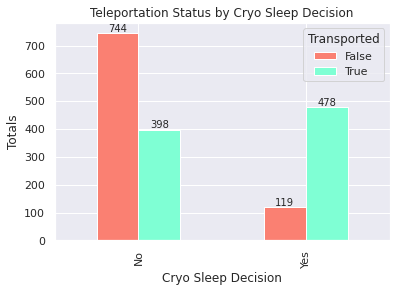

In [ ]:
### Checking correlation between Transported and CryoSleep via graph
test_pred['Cryo_Sleep'] = test_pred['CryoSleep'].map({1:'Yes', 0:'No', \
                                                      '': np.nan})

### Checking correlation between Transported and Home Planet via graph
CS_CT = pd.crosstab(test_pred.Cryo_Sleep,test_pred.Transported)
ax = CS_CT.plot(kind='bar',color=['salmon', 'aquamarine'])

## Add values to bars
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)

plt.title('Teleportation Status by Cryo Sleep Decision')
plt.xlabel('Cryo Sleep Decision')
plt.ylabel('Totals')
plt.show()

### Visual 1: Teleportation Status by Cryo Sleep Decision<br>
The visualization compares the relationship between the CryoSleep decision and the teleportation status for a dataset of passengers. It shows that among those who decided to undergo 'Cryo Sleep' before teleportation, there are more people who were 'Transported' than those who were not. However, among those who decided not to undergo 'Cryo Sleep', there are more people who were not 'Transported' than those who were. This suggests that the decision to undergo Cryo Sleep may be a good predictor of the 'Transported' variable.This claim is further suggested by the Feature Importance graph.

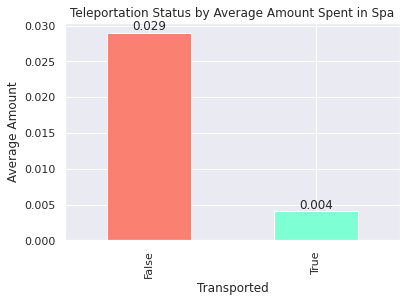

In [ ]:
### Checking correlation between Transported and Average Amount Spent in Spa
Spa_df = test_pred.groupby('Transported')['Spa'].mean().T
Spa_df.plot(kind='bar',color=['salmon', 'aquamarine'])

## Add values to bars
for i in range(len(Spa_df)):
    plt.text(i, round(Spa_df[i],3),round(Spa_df[i],3), ha='center', va='bottom')

plt.title('Teleportation Status by Average Amount Spent in Spa')
plt.xlabel('Transported')
plt.ylabel('Average Amount')
plt.show()

### Visual 2: Teleportation Status by Average Amount Spent in Spa<br>
The visualization highlights the average amount spent in the spa for passengers who were transported (teleported) versus those who were not transported. Looking at the chart, there is a difference in the average amount spent on Spa between the two categories of 'Transported'. The category 'Not Transported' has a higher average amount spent in Spa than 'Transported'.This suggests that the decision to spend less amount in 'Spa' may be a good predictor of the 'Transported' variable.This claim is further suggested by the Feature Importance graph.

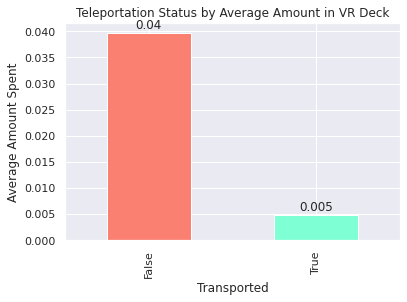

In [ ]:
### Checking correlation between Transported and Average Amount Spent in VR Deck
VR_df = test_pred.groupby('Transported')['VRDeck'].mean().T
VR_df.plot(kind='bar',color=['salmon', 'aquamarine'])

## Add values to bars
for i in range(len(VR_df)):
    plt.text(i, round(VR_df[i],3),round(VR_df[i],3),ha='center',va='bottom')

plt.title('Teleportation Status by Average Amount in VR Deck')
plt.xlabel('Transported')
plt.ylabel('Average Amount Spent')
plt.show()

### Visual 3: Teleportation Status by Average Amount Spent in VR Deck<br>
This graphic analyzes the relationship between the passengers being transported and those that were not and the average amount they spent on VR Deck. The VR Deck is one of the features included in the luxury amenities that the passenger can spend on in the Spaceship. As the graphic represents, the most outstanding average amount spent in VR Deck is from passengers that were not transported to an alternate dimension. This suggests that the decision to spend less amount in 'VR Deck' may be a good predictor of the 'Transported' variable. This claim is further suggested by the Feature Importance graph.

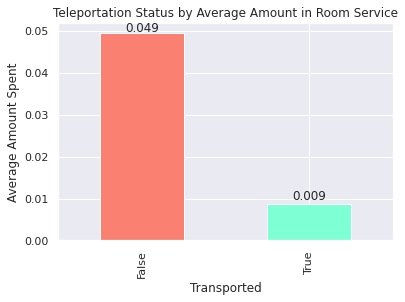

In [ ]:
### Checking correlation between Transported and Ave Amount Spent in Room Service
RS_df = test_pred.groupby('Transported')['RoomService'].mean().T
RS_df.plot(kind='bar',color=['salmon', 'aquamarine'])

## Add values to bars
for i in range(len(RS_df)):
    plt.text(i, round(RS_df[i],3), round(RS_df[i],3), ha='center', va='bottom')

plt.title('Teleportation Status by Average Amount in Room Service')
plt.xlabel('Transported')
plt.ylabel('Average Amount Spent')
plt.show()

### Visual 4: Teleportation Status by Average Amount Spent in Room Service<br>
This graphic analyzes the relationship between the passengers being transported and those that were not and the average amount they spent on Room Service. Room Service is one of the features included in the luxury amenities that the passenger can purchase in a Spaceship. As the graphic represents, the most outstanding average amount spent on Room Service is from passengers that were not transported to an alternate dimension. This suggests that the decision to spend less amount in 'Room Service' may be a good predictor of the 'Transported' variable. This claim is further suggested by the Feature Importance graph.

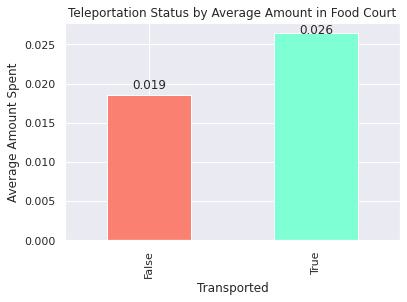

In [ ]:
### Checking correlation between Transported and Ave Amount Spent in Food Court
FC_df = test_pred.groupby('Transported')['FoodCourt'].mean().T
FC_df.plot(kind='bar',color=['salmon', 'aquamarine'])

## Add values to bars
for i in range(len(FC_df)):
    plt.text(i, round(FC_df[i],3), round(FC_df[i],3), ha='center', va='bottom')

plt.title('Teleportation Status by Average Amount in Food Court')
plt.xlabel('Transported')
plt.ylabel('Average Amount Spent')
plt.show()

### Visual 5: Teleportation Status by Average Amount Spent in Food Court<br>
This graphic analyzes the relationship between the passengers being transported and those that were not and the average amount they spent in the Food Court. The Food Court is one of the features included in the luxury amenities that the passenger can purchase in the Spaceship. As the graphic shows, the greatest average amount spent in Food Court is from passengers transported to another dimension but without representing a big gap compared to those not transported. This suggests that the decision to spend more amount in 'Food Court' may be a good predictor of the 'Transported' variable. This claim is further suggested by the Feature Importance graph.

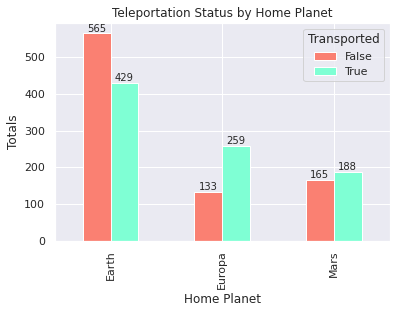

In [ ]:
### Making a Home Planet Variable based on the dummy variables for the 
### Home Planets (Earth, Europa, Mars)

test_pred['Home_Planet'] = ''
test_pred.loc[(test_pred['HomePlanet_Earth'] == 1) & \
              (test_pred['HomePlanet_Europa'] == 0) & \
              (test_pred['HomePlanet_Mars'] == 0), \
              'Home_Planet'] = 'Earth'
test_pred.loc[(test_pred['HomePlanet_Earth'] == 0) & \
              (test_pred['HomePlanet_Europa'] == 1) & \
              (test_pred['HomePlanet_Mars'] == 0), \
              'Home_Planet'] = 'Europa'
test_pred.loc[(test_pred['HomePlanet_Earth'] == 0) & \
              (test_pred['HomePlanet_Europa'] == 0) & \
              (test_pred['HomePlanet_Mars'] == 1), 'Home_Planet'] = 'Mars'

### Checking correlation between Transported and Home Planet via graph
HP_CT = pd.crosstab(test_pred.Home_Planet,test_pred.Transported)
ax = HP_CT.plot(kind='bar',color=['salmon', 'aquamarine'])

## Add values to bars
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)

plt.title('Teleportation Status by Home Planet')
plt.xlabel('Home Planet')
plt.ylabel('Totals')
plt.show()

### Visual 6: Teleportation Status by Home Planet<br>
This graphic analyzes the relationship between the passengers being transported to an alternative dimension and those that were not, to their Home Planets of Earth, Europa, and Mars. The highest amount of passenger is from Earth, where it has the highest amount of both transported and not transported amongst the three home planets. Earth is also the only home planet with more passengers not being transported to an alternative dimension. The other two Home Planets, Europa and Mars, have more percentage of passengers transported to an alternative dimension. Looking at the percentages, the only significant difference between number of transported and those that were not is from Home Planet Europa.

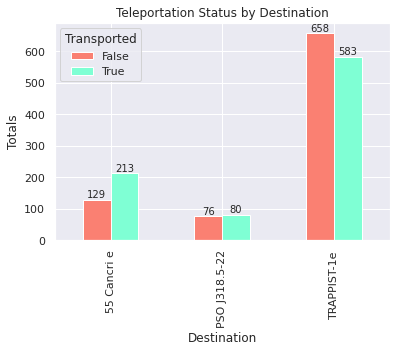

In [ ]:
### Making a Destination Variable based on the dummy variables for the 
### Destination (Cancri, J318, Trappist)

test_pred['Destination'] = ''
test_pred.loc[(test_pred['Destination_55 Cancri e'] == 1) & \
              (test_pred['Destination_PSO J318.5-22'] == 0) & \
              (test_pred['Destination_TRAPPIST-1e'] == 0), \
              'Destination'] = '55 Cancri e'
test_pred.loc[(test_pred['Destination_55 Cancri e'] == 0) & \
              (test_pred['Destination_PSO J318.5-22'] == 1) & \
              (test_pred['Destination_TRAPPIST-1e'] == 0), \
              'Destination'] = 'PSO J318.5-22'
test_pred.loc[(test_pred['Destination_55 Cancri e'] == 0) & \
              (test_pred['Destination_PSO J318.5-22'] == 0) & \
              (test_pred['Destination_TRAPPIST-1e'] == 1), \
              'Destination'] = 'TRAPPIST-1e'


### Checking correlation between Transported and Destination via graph
HP_CT = pd.crosstab(test_pred.Destination,test_pred.Transported)
ax = HP_CT.plot(kind='bar',color=['salmon', 'aquamarine'])

## Add values to bars
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)

plt.title('Teleportation Status by Destination')
plt.xlabel('Destination')
plt.ylabel('Totals')
plt.show()

### Visual 7: Teleportation Status by Destination<br>
This graphic analyzes the relationship between the destination and the status of passengers being transported and those that were not, to 55 Cancri e, PSO J318.5.22 and TRAPPIST.1e. The greatest number of passengers that were transported and that were not, among the three destinations were TRAPPIST.1e., where the greatest number of passengers were not transported. However, there is no significant difference with those that were transported. For the passengers that had as a destination 55 Cancri e, the highest amount was from the passengers that were transported. In the PSO J318.5.22, the passengers transported to the destination were more compared to those not by a minimum difference.

In [ ]:
### Getting the percentage of people transported to another dimension

transported=predictions.loc[predictions['Transported']>0]
transported_perc=((transported['PassengerId'].count()/predictions['PassengerId'].\
                   count())*100).round(2)
print(f"The percentage of people transported to an alternate dimension is \
around {transported_perc}.")

The percentage of people transported to an alternate dimension is around 53.5.


## 3 Bibliography
Sources<br>

<sup>1</sup> Chow, A., Holbrook, R., Howard, A. (2022). <i>Spaceship Titanic</i>. Kaggle. <u>https://kaggle.com/competitions/spaceship-titanic</u>.<br> 

<sup>2</sup> Gorla. (2022, January 17). <i>Cryogenic sleep for space travel</i>. Tomorrow Bio. <u>https://www.tomorrow.bio/post/cryogenic-sleep-for-space-travel</u>.<br>  

<sup>3</sup> Jet Propulsion Laboratory. (2017, November 16). <i> Lava or Not, Exoplanet 55 Cancri e Likely to have Atmosphere</i>. California Institute of Technology. <u> https://www.jpl.nasa.gov/news/lava-or-not-exoplanet-55-cancri-e-likely-to-have-atmosphere </u>.<br>

<sup>4</sup> NASA. (2020, May 14). <i> Why Clouds Form Near Black Holes</i>. <u>https://www.nasa.gov/feature/why-clouds-form-near-black-holes</u>.<br><br>

Sources for modelling:<br>

<sup>5</sup> <i>Sklearn.ensemble.GradientBoostingClassifier. </i> (n.d.). scikit-learn. Retrieved March 8, 2023, from <u>https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html</u>.<br>

<sup>6</sup> <i>Sklearn.impute.KNNImputer. </i> (n.d.). scikit-learn. Retrieved March 8, 2023, from <u>https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html#sklearn.impute.KNNImputer</u>.<br> 

<sup>7</sup> <i>Sklearn.impute.SimpleImputer. </i> (n.d.). scikit-learn. Retrieved March 8, 2023, from <u>https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html</u>.<br> 

<sup>8</sup> <i>Sklearn.preprocessing.OneHotEncoder.</i> (n.d.). scikit-learn. Retrieved March 8, 2023, from <u>https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html</u>.<br>